In [1]:
# --> Test if variables are statistically dependent
# --> SVM Regression
# --> SIR
#TS Forcasting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as linear
import sklearn.preprocessing as preproc
sns.set()

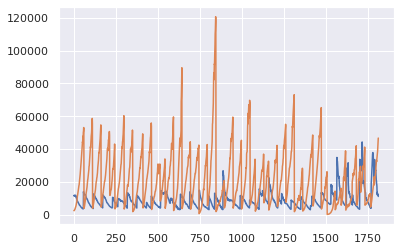

In [3]:
alcohol = pd.read_csv('./data/oecd/DP_LIVE_21032021173004138.csv')['Value']
suicides = pd.read_csv('./data/oecd/DP_LIVE_21032021173037216.csv')['Value'][:len(alcohol)]
yrslost = pd.read_csv('./data/oecd/DP_LIVE_21032021181215568.csv')['Value'][:len(alcohol)]
gdp = pd.read_csv('./data/oecd/DP_LIVE_21032021181335850.csv')['Value'][:len(alcohol)]
#alcohol['Value']
#plt.plot(alcohol)
#plt.plot(suicides)
plt.plot(yrslost)
plt.plot(gdp)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
#n_samples, n_features = 10, 1
#rng = np.random.RandomState(0)
#y = rng.randn(n_samples)
#X = rng.randn(n_samples, n_features)
reg = make_pipeline(#StandardScaler(), 
                    SVR(kernel='poly', degree=3, gamma='auto', coef0=-2.0, tol=1e-2, 
                        C=1.0, epsilon=0.1, shrinking=True, cache_size=500, 
                        verbose=False, max_iter=-1))

#reg = linear.SGDRegressor(fit_intercept=True)
#reg = linear.Ridge(fit_intercept=False, normalize=False, copy_X=True)
X, y = np.array(gdp).reshape(-1,1), np.array(yrslost).reshape(-1,1)
split = 0.7
X_train, y_train = X[:int(split*len(X))], y[:int(split*len(y))]
X_test, y_test = X[int(split*len(X)):], y[int(split*len(y)):]
reg.fit(X_train, y_train.ravel())
y_pred = reg.predict(X_test)#.T[0]
plt.plot(y_pred, label='yrs lost pred')
plt.plot(y_test, label='yrs lost test')
plt.legend()
print(reg.score(X_test, y_test), flush=True)
print(reg.score(X_train, y_train), flush=True)